In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import ceil
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix 
import sklearn.linear_model as linear_model
import sklearn.metrics as metrics
import sklearn as skl
import pdb

## import training data 

In [138]:
train_df = pd.read_table(
    'data-IP/adult.data',sep = ',',
    names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"],
        engine='python',
        na_values="?")
train_df.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [137]:
test_df = pd.read_table('data-IP/adult.test',sep = ',',
        names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"],
        engine='python',
        skiprows=[0],
        na_values="?")
test_df.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


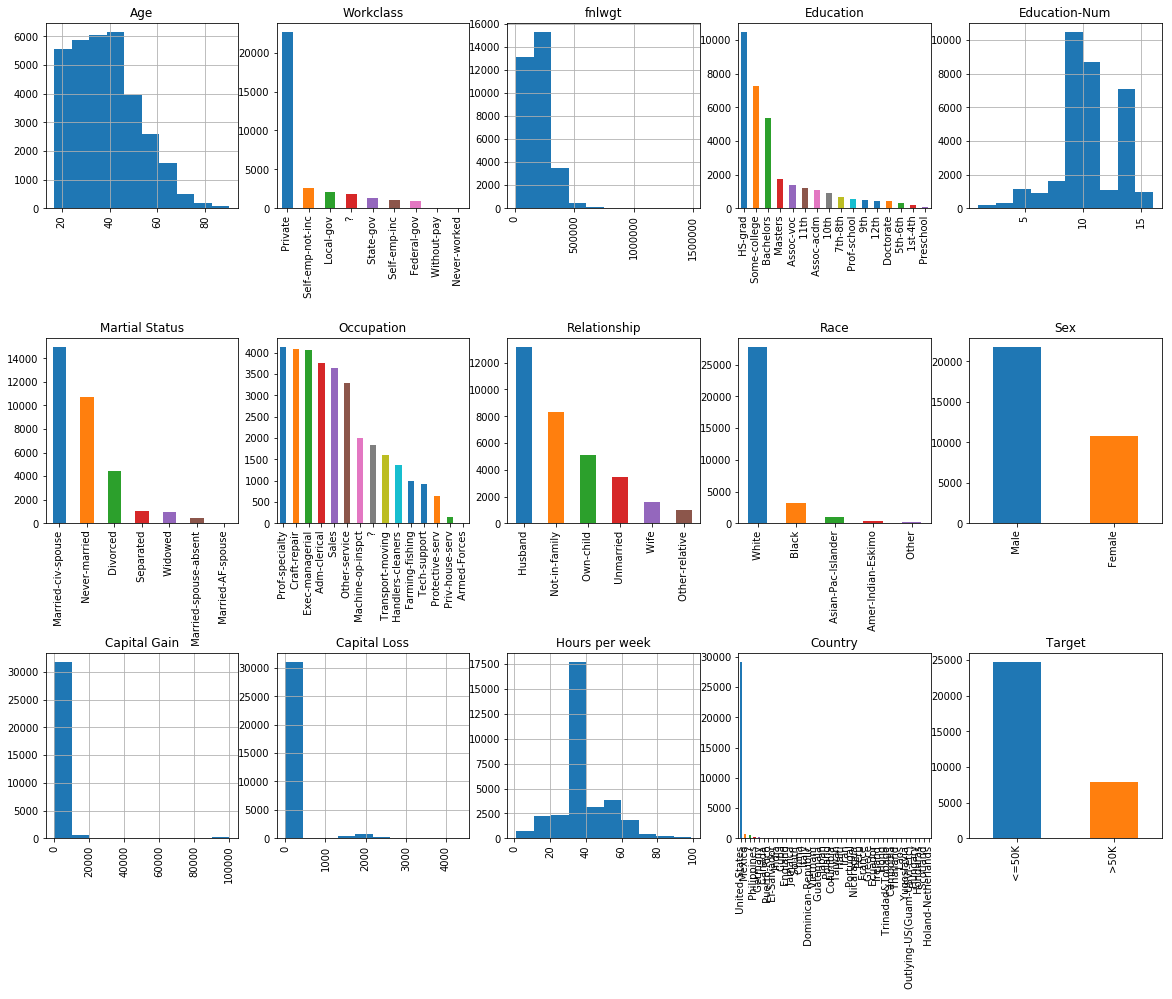

In [139]:
fig = plt.figure(figsize=(20,15))
cols = 5
rows = ceil(float(train_df.shape[1]) / cols)
for i, column in enumerate(train_df.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if train_df.dtypes[column] == np.object:
        train_df[column].value_counts().plot(kind="bar", axes=ax)
    else:
        train_df[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.show()

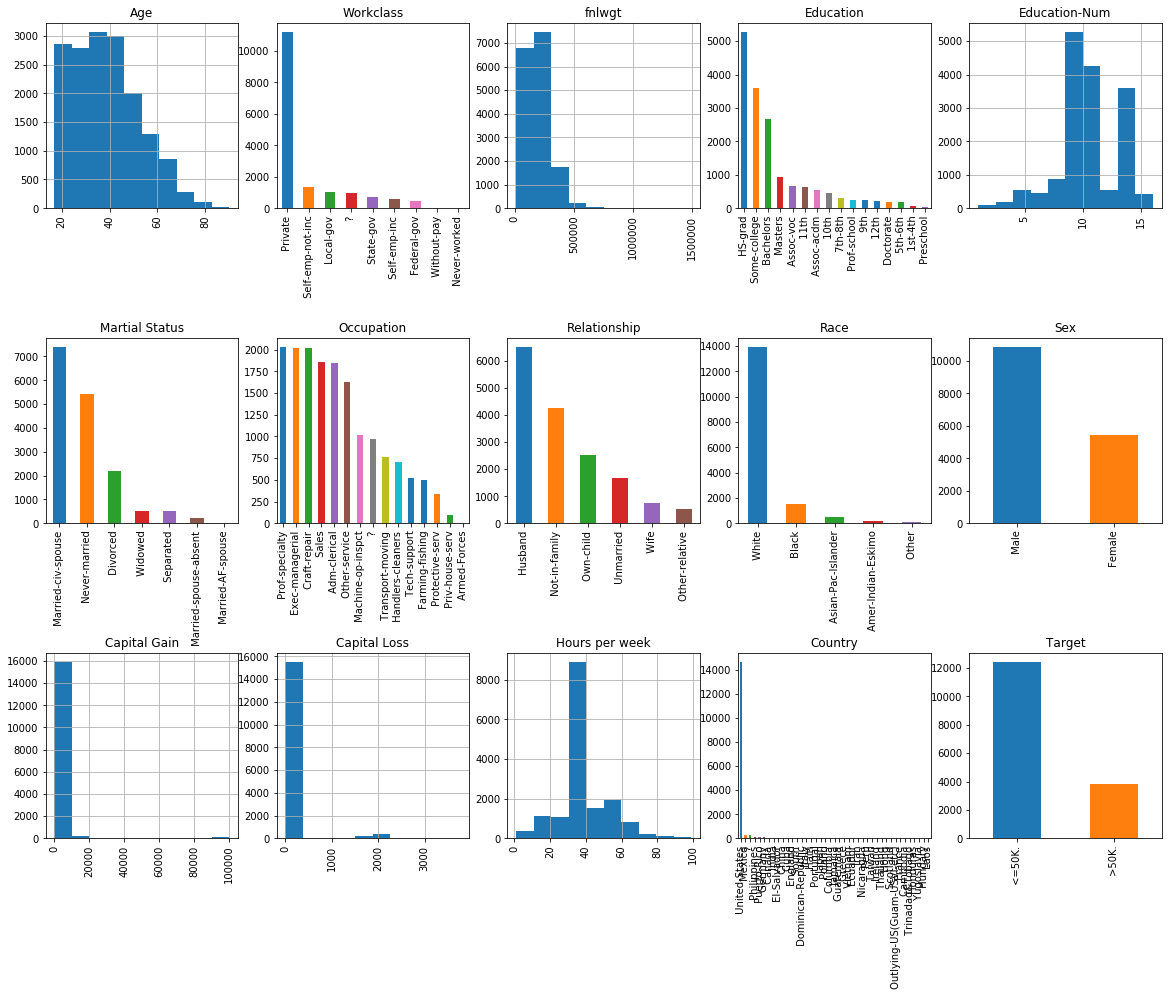

In [140]:
fig = plt.figure(figsize=(20,15))
cols = 5
rows = ceil(float(test_df.shape[1]) / cols)
for i, column in enumerate(test_df.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if test_df.dtypes[column] == np.object:
        test_df[column].value_counts().plot(kind="bar", axes=ax)
    else:
        test_df[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.show()

## Missing value handling

### We found some features with empty value ' ?'

In [109]:
'''
print((train_df["Workclass"].value_counts() / train_df.shape[0]).head())
print()
print((train_df["Occupation"].value_counts() / train_df.shape[0]).head(10))
print()
print((train_df["Country"].value_counts() / train_df.shape[0]).head())
'''

'\nprint((train_df["Workclass"].value_counts() / train_df.shape[0]).head())\nprint()\nprint((train_df["Occupation"].value_counts() / train_df.shape[0]).head(10))\nprint()\nprint((train_df["Country"].value_counts() / train_df.shape[0]).head())\n'

### Add 'missing flag', if the sample contains missing value, it will marked True; Else it marked False

In [110]:
addMissingFlag = False
if addMissingFlag:
    train_df['missing_flag'] = (train_df['Workclass'] == " ?") | (train_df['Country'] == " ?" ) | (train_df['Occupation'] == ' ?')

#train_df.head(20)
#train_df.tail(30)


### Fill the missing data to '0'

In [111]:
#train_df.replace(to_replace={' ?': 0})
fillMissing = False
if fillMissing:
    train_df.replace(to_replace={' ?': 0},inplace=True)
    
#train_df.head(20)


## Data analyst

### We drop 'fnlwgt' and 'Education' features

In [112]:
train_df[["Education", "Education-Num"]].head(15)

,Education,Education-Num
0,Bachelors,13
1,Bachelors,13
2,HS-grad,9
3,11th,7
4,Bachelors,13
5,Masters,14
6,9th,5
7,HS-grad,9
8,Masters,14
9,Bachelors,13


In [113]:
test_df[["Education", "Education-Num"]].head(15)

,Education,Education-Num
0,11th,7
1,HS-grad,9
2,Assoc-acdm,12
3,Some-college,10
4,Some-college,10
5,10th,6
6,HS-grad,9
7,Prof-school,15
8,Some-college,10
9,7th-8th,4


In [114]:
#del train_df['fnlwgt']
del train_df['Education']
del test_df['Education']

### How to deal with the weak relation between 'sex' and 'Relationship'

In [115]:
train_df[["Sex", "Relationship"]].head(15)

# Male - Husband; Female - Wife (how to merge these two lists? Weak relation)

,Sex,Relationship
0,Male,Not-in-family
1,Male,Husband
2,Male,Not-in-family
3,Male,Husband
4,Female,Wife
5,Female,Wife
6,Female,Not-in-family
7,Male,Husband
8,Female,Not-in-family
9,Male,Husband


### Encode the categorical features as numbers

In [116]:
# Encode the categorical features as numbers
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            #encoders[column] = preprocessing.OneHotEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

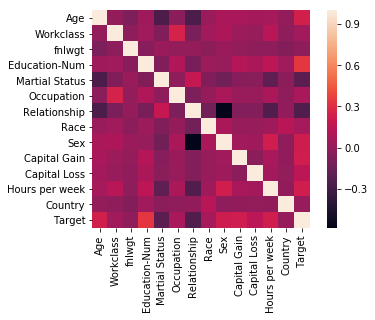

In [117]:
# Calculate the correlation and plot it
# encoded object with discrete value
encoded_data, _ = number_encode_features(train_df)
sns.heatmap(encoded_data.corr(), square=True)
plt.show()

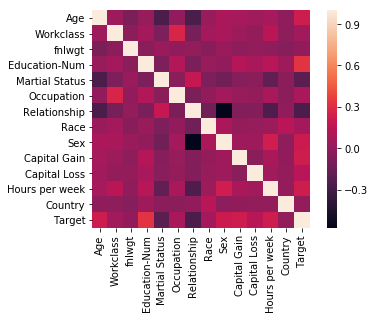

In [118]:
encoded_test, _ = number_encode_features(test_df)
sns.heatmap(encoded_test.corr(), square=True)
plt.show()

In [119]:
#import sklearn.cross_validation as cross_validation
X_train = encoded_data.drop(['Target'],axis=1,inplace=False)
y_train = encoded_data['Target']

X_test = encoded_test.drop(['Target'],axis=1,inplace=False)
y_test = encoded_test['Target']

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.70)   

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(22792, 13) (22792,)
(9769, 13) (9769,)
(16281, 13) (16281,)


/Users/jeanneluo/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [120]:
scaler = preprocessing.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train.astype("float64")), columns=X_train.columns)
X_valid = pd.DataFrame(scaler.fit_transform(X_valid.astype("float64")), columns=X_valid.columns)
#X_test = scaler.transform(X_test.astype("float64"))
X_test = pd.DataFrame(scaler.fit_transform(X_test.astype("float64")), columns=X_test.columns)

In [149]:
# GaussianNB
from sklearn.naive_bayes import GaussianNB

clf_gnb = GaussianNB()

clf_gnb.fit(X_train, y_train)

y_pred_gnb = clf_gnb.predict(X_test)
acc_gnb = round(100*(np.mean(y_pred_gnb == y_test)))
f1_gnb = metrics.f1_score(y_test, y_pred_gnb)
print('acc_gnb: ', acc_gnb)
print('f1_gnb: ', f1_gnb)

'''
cm_bnb = metrics.confusion_matrix(y_test_b, y_pred_bnb)

plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.heatmap(cm_bnb, annot=True, fmt="d", xticklabels=encoders["Target"].classes_, yticklabels=encoders["Target"].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")
print("F1 score: %f" % skl.metrics.f1_score(y_test_b, y_pred_bnb))
valid = np.mean(y_pred_bnb == y_test_b)
print("The accuracy is {:.2f}%".format(100*valid))
coefs = pd.Series(bnb.coef_[0], index=X_train_b.columns)
coefs.sort_values()
ax = plt.subplot(2,1,2)
coefs.plot(kind="bar")
plt.show()
'''

acc_gnb:  80.0
f1_gnb:  0.43154551870148194


'\ncm_bnb = metrics.confusion_matrix(y_test_b, y_pred_bnb)\n\nplt.figure(figsize=(15,15))\nplt.subplot(2,1,1)\nsns.heatmap(cm_bnb, annot=True, fmt="d", xticklabels=encoders["Target"].classes_, yticklabels=encoders["Target"].classes_)\nplt.ylabel("Real value")\nplt.xlabel("Predicted value")\nprint("F1 score: %f" % skl.metrics.f1_score(y_test_b, y_pred_bnb))\nvalid = np.mean(y_pred_bnb == y_test_b)\nprint("The accuracy is {:.2f}%".format(100*valid))\ncoefs = pd.Series(bnb.coef_[0], index=X_train_b.columns)\ncoefs.sort_values()\nax = plt.subplot(2,1,2)\ncoefs.plot(kind="bar")\nplt.show()\n'

In [150]:
# SVC

from sklearn.svm import SVC
clf_svc = SVC(gamma='auto')
clf_svc.fit(X_train, y_train) 

y_pred_svc = clf_svc.predict(X_test)

acc_svc = round(100*(np.mean(y_pred_svc == y_test)))
f1_svc = metrics.f1_score(y_test, y_pred_svc)

print('acc_svc: ', acc_svc)
print('f1_svc: ', f1_svc)

'''
cm_svc = metrics.confusion_matrix(y_test_b, y_pred_svc)

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.heatmap(cm_svc, annot=True, fmt="d", xticklabels=encoders["Target"].classes_, yticklabels=encoders["Target"].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")
print("F1 score: %f" % skl.metrics.f1_score(y_test_b, y_pred_svc))
valid = np.mean(y_pred_svc == y_test_b)
print("The accuracy is {:.2f}%".format(100*valid))
plt.show()
'''

acc_svc:  85.0
f1_svc:  0.6302993466038597


'\ncm_svc = metrics.confusion_matrix(y_test_b, y_pred_svc)\n\nplt.figure(figsize=(10,10))\nplt.subplot(2,1,1)\nsns.heatmap(cm_svc, annot=True, fmt="d", xticklabels=encoders["Target"].classes_, yticklabels=encoders["Target"].classes_)\nplt.ylabel("Real value")\nplt.xlabel("Predicted value")\nprint("F1 score: %f" % skl.metrics.f1_score(y_test_b, y_pred_svc))\nvalid = np.mean(y_pred_svc == y_test_b)\nprint("The accuracy is {:.2f}%".format(100*valid))\nplt.show()\n'

In [151]:
# MLP

from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(solver='adam', alpha=1e-3,
                        hidden_layer_sizes=(3, 2), random_state=1)
clf_mlp.fit(X_train, y_train) 

y_pred_mlp = clf_mlp.predict(X_test)

acc_mlp = round(100*(np.mean(y_pred_mlp == y_test)))
f1_mlp = metrics.f1_score(y_test, y_pred_mlp)

print('acc_mlp: ', acc_mlp)
print('f1_mlp: ', f1_mlp)
'''
cm_mlp = metrics.confusion_matrix(y_test_b, y_pred_mlp)

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.heatmap(cm_mlp, annot=True, fmt="d", xticklabels=encoders["Target"].classes_, yticklabels=encoders["Target"].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")
print("F1 score: %f" % skl.metrics.f1_score(y_test_b, y_pred_mlp))
valid = np.mean(y_pred_mlp == y_test_b)
print("The accuracy is {:.2f}%".format(100*valid))
plt.show()
'''

acc_mlp:  83.0
f1_mlp:  0.59739481958377


'\ncm_mlp = metrics.confusion_matrix(y_test_b, y_pred_mlp)\n\nplt.figure(figsize=(10,10))\nplt.subplot(2,1,1)\nsns.heatmap(cm_mlp, annot=True, fmt="d", xticklabels=encoders["Target"].classes_, yticklabels=encoders["Target"].classes_)\nplt.ylabel("Real value")\nplt.xlabel("Predicted value")\nprint("F1 score: %f" % skl.metrics.f1_score(y_test_b, y_pred_mlp))\nvalid = np.mean(y_pred_mlp == y_test_b)\nprint("The accuracy is {:.2f}%".format(100*valid))\nplt.show()\n'

In [60]:
models = pd.DataFrame({
    'Model': ['BeroulliNB', 'GaussianNB', 'Support Vector Machines', 'Multi-layer Perceptron'],
    'F1 Score': [f1_bnb, f1_gnb,f1_svc, f1_mlp], 
    'Score': [acc_bnb, acc_gnb, acc_svc, acc_mlp]})
models.sort_values(by='Score', ascending=False)

,Model,F1 Score,Score
2,Support Vector Machines,0.629262,85.0
3,Multi-layer Perceptron,0.635097,84.0
0,BeroulliNB,0.592044,81.0
1,GaussianNB,0.428370,80.0


### Onehot encoded features

(32561, 15)
(16281, 15)
(32561, 109)
(16281, 108)


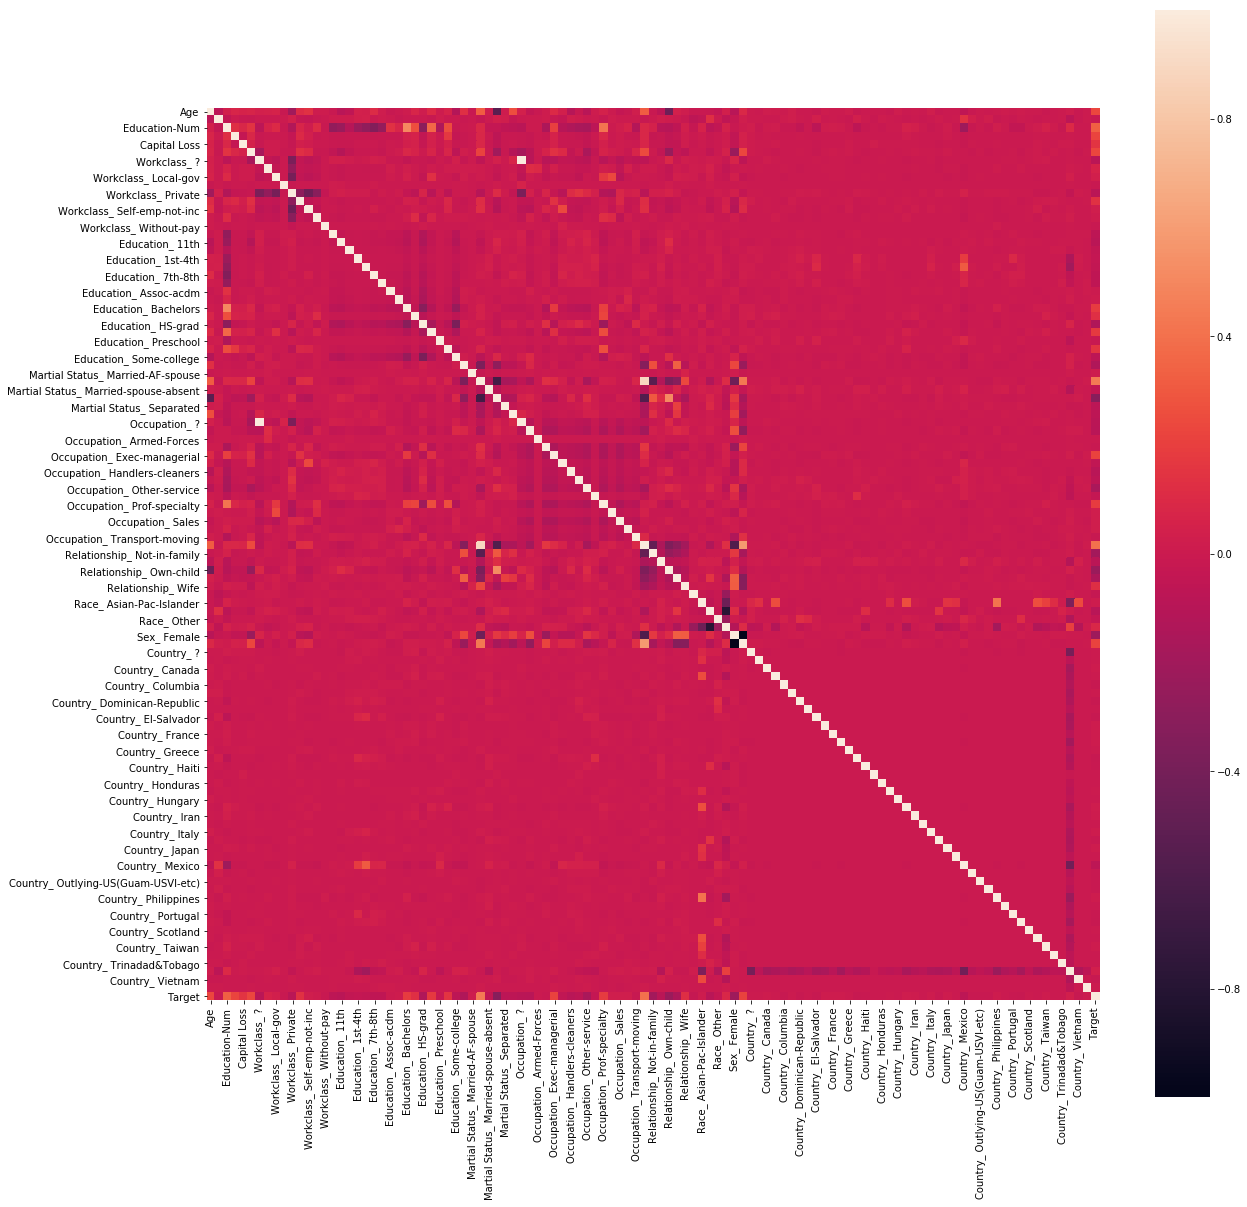

                                          Age    fnlwgt  Education-Num  \
Age                                  1.000000 -0.076646       0.036527   
fnlwgt                              -0.076646  1.000000      -0.043195   
Education-Num                        0.036527 -0.043195       1.000000   
Capital Gain                         0.077674  0.000432       0.122630   
Capital Loss                         0.057775 -0.010252       0.079923   
Hours per week                       0.068756 -0.018768       0.148123   
Workclass_ ?                         0.042627 -0.002923      -0.077946   
Workclass_ Federal-gov               0.051227 -0.007525       0.060518   
Workclass_ Local-gov                 0.060901 -0.002828       0.097941   
Workclass_ Never-worked             -0.019362  0.005031      -0.015117   
Workclass_ Private                  -0.198388  0.042907      -0.118484   
Workclass_ Self-emp-inc              0.102692 -0.024626       0.077358   
Workclass_ Self-emp-not-inc          0

In [159]:
binary_data = pd.get_dummies(train_df)
# Let's fix the Target as it will be converted to dummy vars too
binary_data['Target'] = binary_data['Target_ >50K']

del binary_data["Target_ <=50K"]
del binary_data["Target_ >50K"]

binary_test = pd.get_dummies(test_df)
binary_test['Target'] = binary_test['Target_ >50K.']

del binary_test["Target_ <=50K."]
del binary_test["Target_ >50K."]

'''
plt.subplots(figsize=(20,20))
sns.heatmap(binary_data.corr(), square=True)
plt.show()
'''
print(train_df.shape)
print(test_df.shape)

print(binary_data.shape)
print(binary_test.shape)

plt.subplots(figsize=(20,20))
sns.heatmap(binary_data.corr(), square=True)
plt.show()
print(binary_data.corr())

In [153]:
data_b = binary_data.drop(['Target'],axis=1,inplace=False)
label_b = binary_data['Target']

X_test_b = binary_test.drop(['Target'],axis=1,inplace=False)
y_test_b = binary_test['Target']

'''
X_train_b, X_valid_b, y_train_b, y_valid_b = train_test_split(data_b, label_b, train_size=0.70)   
scaler = preprocessing.StandardScaler()
X_train_b = pd.DataFrame(scaler.fit_transform(X_train_b), columns=X_train_b.columns)
X_valid_b = pd.DataFrame(scaler.fit_transform(X_valid_b), columns=X_valid_b.columns)
X_test_b = pd.DataFrame(scaler.fit_transform(X_test_b), columns=X_test_b.columns)
'''

print(X_train_b.shape, y_train_b.shape)
print(X_valid_b.shape, y_valid_b.shape)
print(X_test_b.shape, y_test_b.shape)

(22792, 92) (22792,)
(9769, 92) (9769,)
(16281, 107) (16281,)


In [164]:
# Compare LabelEncoder and OnehotEncoder

clf_mlp.fit(X_train, y_train) 
y_pred_enc = clf_mlp.predict(X_valid)
mlp_acc_enc = round(100*(np.mean(y_pred_enc == y_valid)))
mlp_f1_enc = metrics.f1_score(y_valid, y_pred_enc)

clf_gnb.fit(X_train, y_train) 
y_pred_enc = clf_gnb.predict(X_valid)
gnb_acc_enc = round(100*(np.mean(y_pred_enc == y_valid)))
gnb_f1_enc = metrics.f1_score(y_valid, y_pred_enc)
print(' *** Gaussian NB - LabelEncoded ***')
print(confusion_matrix(y_valid_b,y_pred_enc))  
print(classification_report(y_valid_b, y_pred_enc))

clf_svc.fit(X_train, y_train) 
y_pred_enc = clf_svc.predict(X_valid)
svc_acc_enc = round(100*(np.mean(y_pred_enc == y_valid)))
svc_f1_enc = metrics.f1_score(y_valid, y_pred_enc)

clf_mlp.fit(X_train_b, y_train_b) 
y_pred_onehot = clf_enc.predict(X_valid_b)
mlp_acc_onehot = round(100*(np.mean(y_pred_onehot == y_valid_b)))
mlp_f1_onehot = metrics.f1_score(y_valid_b, y_pred_onehot)

clf_gnb.fit(X_train_b, y_train_b) 
y_pred_onehot = clf_gnb.predict(X_valid_b)
gnb_acc_onehot = round(100*(np.mean(y_pred_onehot == y_valid_b)))
gnb_f1_onehot = metrics.f1_score(y_valid_b, y_pred_onehot)
print(' *** Gaussian NB - OneHotEncoder ***')
print(confusion_matrix(y_valid_b,y_pred_onehot))  
print(classification_report(y_valid_b, y_pred_onehot))

clf_svc.fit(X_train_b, y_train_b) 
y_pred_onehot = clf_svc.predict(X_valid_b)
svc_acc_onehot = round(100*(np.mean(y_pred_onehot == y_valid_b)))
svc_f1_onehot = metrics.f1_score(y_valid_b, y_pred_onehot)

'''
cm_mlp = metrics.confusion_matrix(y_test_b, y_pred_mlp)

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.heatmap(cm_mlp, annot=True, fmt="d", xticklabels=encoders["Target"].classes_, yticklabels=encoders["Target"].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")
print("F1 score: %f" % skl.metrics.f1_score(y_test_b, y_pred_mlp))
valid = np.mean(y_pred_mlp == y_test_b)
print("The accuracy is {:.2f}%".format(100*valid))
plt.show()
'''

 *** Gaussian NB - LabelEncoded ***
[[6529  834]
 [2126  280]]
              precision    recall  f1-score   support

           0       0.75      0.89      0.82      7363
           1       0.25      0.12      0.16      2406

   micro avg       0.70      0.70      0.70      9769
   macro avg       0.50      0.50      0.49      9769
weighted avg       0.63      0.70      0.65      9769



/Users/jeanneluo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jeanneluo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


 *** Gaussian NB - OneHotEncoder ***
[[7363    0]
 [2406    0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      7363
           1       0.00      0.00      0.00      2406

   micro avg       0.75      0.75      0.75      9769
   macro avg       0.38      0.50      0.43      9769
weighted avg       0.57      0.75      0.65      9769



'\ncm_mlp = metrics.confusion_matrix(y_test_b, y_pred_mlp)\n\nplt.figure(figsize=(10,10))\nplt.subplot(2,1,1)\nsns.heatmap(cm_mlp, annot=True, fmt="d", xticklabels=encoders["Target"].classes_, yticklabels=encoders["Target"].classes_)\nplt.ylabel("Real value")\nplt.xlabel("Predicted value")\nprint("F1 score: %f" % skl.metrics.f1_score(y_test_b, y_pred_mlp))\nvalid = np.mean(y_pred_mlp == y_test_b)\nprint("The accuracy is {:.2f}%".format(100*valid))\nplt.show()\n'

In [156]:
models_encoded = pd.DataFrame({
    'Model': ['MPL', 'MPL Onehot','GaussianNB', 'GaussianNB Onehot', 'SVC', 'SVC Onehot'],
    'F1 Score': [mlp_f1_enc, mlp_f1_onehot, gnb_f1_enc, gnb_f1_onehot, svc_f1_enc, svc_f1_onehot], 
    'Score': [mlp_acc_enc, mlp_acc_onehot, gnb_acc_enc, gnb_acc_onehot, svc_acc_enc, svc_acc_onehot]})
models_encoded.sort_values(by='F1 Score', ascending=False)

,Model,F1 Score,Score
1,MPL Onehot,0.671638,85.0
5,SVC Onehot,0.645161,85.0
4,SVC,0.625912,85.0
0,MPL,0.596178,83.0
2,GaussianNB,0.426776,80.0
3,GaussianNB Onehot,0.000000,75.0


In [ ]:
'''
submission = pd.DataFrame({
        "PassengerId": test_df["Target"],
        "Survived": Y_pred
    })

submission.to_csv('../submission.csv', index=False)
'''